$$
\newcommand{\b}[1]{\mathbf{#1}}
\newcommand{\t}[1]{{#1}^{\intercal}}
\newcommand{\d}[2]{\t{\b{#1}}\b{#2}}
\newcommand{\vv}[2]{\begin{vmatrix} #1 \\ #2 \end{vmatrix}}
\newcommand{\vh}[2]{\begin{vmatrix} #1 & #2 \end{vmatrix}}
\newcommand{\mq}[4]{\begin{vmatrix} #1 & #2 \\ #3 & #4 \end{vmatrix}}
$$

# Who cares about the transpose?

Exchanging rows and columns of a matrix is hardly an inspiring operation. Yet in linear algebra we frequently take the transpose of a matrix. Why is that?

<!-- more -->

To understand why the transpose is so important, we first need to understand two fundamental spaces associated with a matrix, the row space and the column space. To see why these two spaces are so important, let us work our way through an example. 

## The column space
Consider the following matrix:

$$
A=\b{u}\t{\b{v}}=\vv{1}{3}\cdot\vh{2}{1}=\mq{2}{1}{6}{3}
$$

What does the linear transformation associated with $A$ look like? In other words, what is $A\b{x}$? By using the definition of $A$ in terms of $\b{u}$ and $\b{v}$, we see that:

$$
A\b{x}=\b{u}\cdot(\d{v}{x})
$$

Since $\d{v}{x}$ is a scalar (a number), $A\b{x}$ is just $\b{u}$ stretched by a certain amount, precisely $\d{v}{x}$.

Let's take some points and see where $A$ maps them:

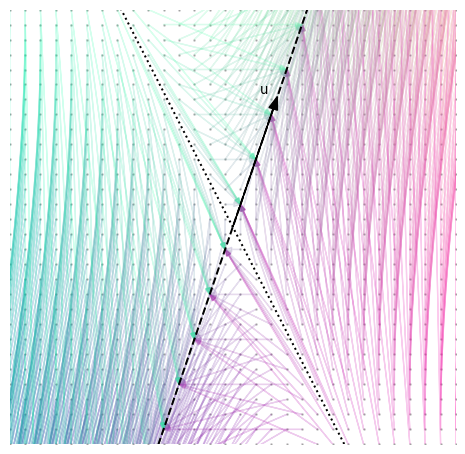

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def nice_figure(plot_fn):
    fig = plt.figure(figsize=(6, 6), dpi=96)
    ax = fig.subplots()

    plot_fn(fig, ax)
    
    ax.set_xticks([])
    ax.set_yticks([])

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)


def arrow_from_to(ax, fr, to, *args, **kwargs):
    if 'length_includes_head' not in kwargs:
        kwargs['length_includes_head'] = True
    if 'head_width' not in kwargs:
        kwargs['head_width'] = 0.2
    ax.arrow(fr[0], fr[1], to[0] - fr[0], to[1] - fr[1], *args, **kwargs)


def plot_linear_map(ax, matrix, lb, ub, n_points):
    ll = np.linspace(lb, ub, n_points)
    xx, yy = np.meshgrid(ll, ll)
    ps = np.vstack([xx.ravel(), yy.ravel()])
    ys = (matrix @ ps)

    ax.scatter(ps[0], ps[1], s=1, c='k', alpha=0.2)
    for (x1, x2), (y1, y2) in zip(ps.T, ys.T):
        rr = int(255 * (x1 - lb) / (ub - lb))
        gg = int(255 * (x2 - lb) / (ub - lb))
        arrow_from_to(ax, (x1, x2), (y1, y2), alpha=0.2, color='#%02x%02xaa' % (rr, gg), head_width=0.1)


def plot_fig_1(fig, ax):
    lb, ub = -5, 5
    plot_linear_map(ax, np.array([[2, 1], [6, 3]]), lb, ub, n_points=30)
    
    arrow_from_to(ax, (0, 0), (1, 3), color='k')
    ax.annotate('u', (0.6, 3), ha='left', va='bottom')
    ax.plot([-10, 10], [-30, 30], 'k--')
    ax.plot([-10, 10], [20, -20], 'k:')
    
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)


nice_figure(plot_fig_1)

Each point in the grid is connected to the point that $A$ maps it to. There are a few interesting things to notice:

 1. The destination points all lie on a line parallel to $\b{u}$,
 2. Several points are mapped to the same location on the line, and
 3. The points that are mapped to the same location seem to be organized in rows that are parallel to the dotted line.
 
We showed the first point above. Every vector transformed by $A$ is "squashed" onto $\b{u}$. Any point that cannot be reached by stretching $\b{u}$, cannot be reached by transforming another point with $A$. Vice-versa, any point that can be reached by stretching $\b{u}$, can be reached by transforming a certain point with $A$.

The column space of $A$ is:

$$
\b{C}(A)=a\cdot\vv{2}{6}+b\cdot\vv{1}{3}=(a+2b)\cdot\vv{1}{3}=(a+2b)\cdot\b{u}
$$

For all possible choices of $a,b\in\mathbb{R}$. In English, the column space of $A$ contains all points that can be reached by stretching $\b{u}$. Does this sound familiar? It should!

<hr />
<p style="text-align:center;margin:auto;padding:15px;width:70%;">
 The column space of a matrix contains all vectors that result from multiplying a vector with that matrix.
</p>
<hr />

## The row space

The third observation is the most interesting, let's focus on some examples:

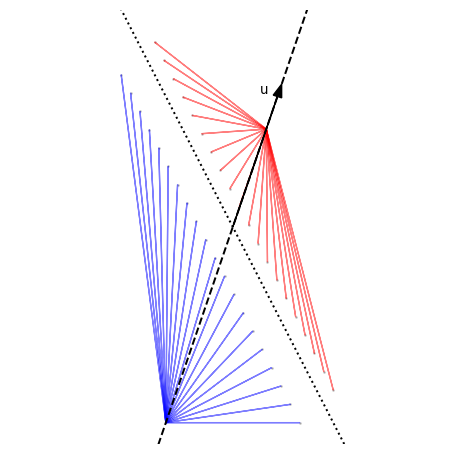

In [2]:
def plot_fig_2(fig, ax):
    lb, ub = -5, 5

    ll = np.linspace(-2, 2, 20)
    A = np.array([[2, 1], [6, 3]])

    for b in [-0.5, 0.25]:
        ps = np.array([[-1], [2]]) * ll + b
        ys = (A @ ps)
        
        ax.scatter(ps[0], ps[1], s=1, c='k', alpha=0.2)
        for (x1, x2), (y1, y2) in zip(ps.T, ys.T):
            ax.arrow(x1, x2, y1 - x1, y2 - x2, alpha=0.5, color='r' if b > 0 else 'b')

    ax.arrow(0, 0, 1, 3, color='k', head_width=0.2)
    ax.annotate('u', (0.6, 3), ha='left', va='bottom')
    ax.plot([-10, 10], [-30, 30], 'k--')
    ax.plot([-10, 10], [20, -20], 'k:')
    
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)


nice_figure(plot_fig_2)

That seems to be the case: the points that are mapped to the same location seem to be organized in rows that are parallel to the dotted line. How can we find what the dotted line is?

Suppose we have two vectors $\b{x}$ and $\b{y}$ that are mapped to the same point, i.e. $A\b{x}=A\b{y}$. By plugging in the definition of $A$ we get

$$
\b{u}\d{v}{x}=\b{u}\d{v}{y}
$$

Since both of these vectors are parallel to $\b{u}$, we can discard it to obtain:

$$
\d{v}{x}=\d{v}{y}
$$

or, equivalently,

$$
\t{\b{v}}(\b{x}-\b{y})=0
$$

This means that $\b{x}$ and $\b{y}$ are mapped to the same point when the vector joining them, $\b{x}-\b{y}$ is orthogonal to $\b{v}$. And, vice-versa, if two vectors are mapped to the same point, then their difference is orthogonal to $\b{v}$.

Another way to look at this is that, given a vector $\b{x}$, we can find another vector $\b{y}$ that is mapped to the same point by $A$ simply by adding to $\b{x}$ a vector, say $\b{v}^\perp$, that is perpendicular to $\b{v}$. As a compact formula:

$$
A(\b{x}+\b{v}^\perp)=A\b{x}+A\b{v}^\perp=A\b{x}+\b{u}(\t{\b{v}}\b{v}^\perp)=A\b{x}+\b{u}\cdot 0=A\b{x}
$$

This vector $\b{v}^\perp$ corresponds exactly to the dotted line in the plot above!

Now, given any vector $\b{x}$, there is an unique way to decompose it into a component that is parallel to $\b{v}$ and a component that is orthogonal to it:

$$
\b{x}=a\cdot\b{v}+b\cdot\b{v}^\perp
$$

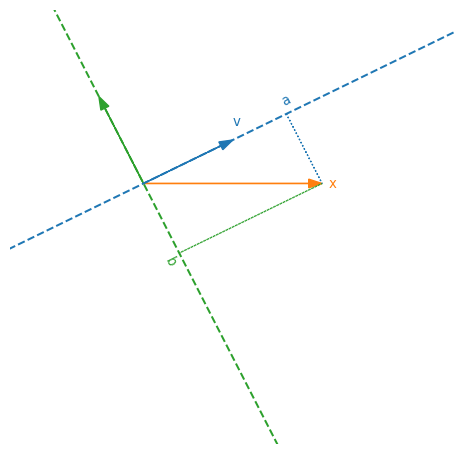

In [3]:
def plot_fig_3(fig, ax):
    # v
    arrow_from_to(ax, (0, 0), (2, 1), color='C0')
    ax.annotate('v', (2, 1.25), ha='left', va='bottom', color='C0')
    ax.plot([-20, 20], [-10, 10], 'C0--')

    # u
    arrow_from_to(ax, (0, 0), (-1, 2), color='C2')
    ax.plot([10, -10], [-20, 20], 'C2--')

    # x
    arrow_from_to(ax, (0, 0), (4, 0), color='C1')
    ax.annotate('x', (4.15, 0), va='center', color='C1')

    # projection on u and v
    x1, x2 = 4, 0
    v1, v2 = 2, 1
    p = (v1 * x1 + v2 * x2) / (v1**2 + v2**2)
    q = (-v2 * x1 + v1 * x2) / (v1**2 + v2**2)

    # dotted lines
    arrow_from_to(ax, (x1, x2), (2 * p, 1 * p), color='C0', linestyle=':', head_width=0)
    arrow_from_to(ax, (x1, x2), (-v2 * q, v1 * q), color='C2', linestyle=':', head_width=0)

    # labels
    ax.annotate(f'a', (v1 * p, v2 * p), (0, 10), ha='center', va='center',
                textcoords='offset points', rotation=180 * np.arctan(0.5) / np.pi,
                color='C0')
    ax.annotate(f'b', (-v2 * q, v1 * q), (-7, -7), ha='center', va='center',
                textcoords='offset points', rotation=-180 * np.arctan(2) / np.pi,
                color='C2')

    ax.set_xlim(-3, 7)
    ax.set_ylim(-6, 4)

nice_figure(plot_fig_3)



And transforming such a vector with $A$ gives:

$$
A(a\cdot\b{v}+b\cdot\b{v}^\perp)=a(\t{\b{v}}\b{v})\cdot\b{u}
$$

Let's walk through a numerical example to see this more clearly.

First, given $\b{v}=\t{|2,1|}$, its perpendicular is $\b{v}^\perp=\t{|-1,2|}$, since $2\cdot(-1)+1\cdot2=0$. Consider now a vector $\b{x}=\t{|4,0|}$, we can write it in terms of $\b{v}$ and $\b{v}^\perp$:

$$
\b{x}=\vv{4}{0}=a\cdot\b{v}+b\cdot\b{v}^\perp
=\frac{8}{5}\cdot\vv{2}{1}-\frac{4}{5}\cdot\vv{-1}{2}
=\frac{1}{5}\left(\vv{16}{8}+\vv{4}{-8}\right)
$$

How to find those two numbers? Trivially, from the relation between dot-product and projections:

$$
\d{x}{v}=\d{v}{v}\cdot\d{x}{x}\cdot\cos\alpha
$$

Which means that the projection of $\b{x}$ onto $\b{v}$ and $\b{v}^\perp$ are given by:

$$
a=\frac{\d{x}{v}}{\d{v}{v}}=\frac{4\cdot 2+0\cdot1}{2\cdot 2+1\cdot 1}=\frac{8}{5}
$$

$$
b=\frac{\d{x}{v^\perp}}{\d{v}{v}}=\frac{4\cdot(-1)+0\cdot 2}{(-1)\cdot(-1)+2\cdot 2}=-\frac{4}{5}
$$

Consider now a second vector $\b{y}=\t{|5,2|}$, by an entirely analoguous reasoning we find that

$$
\b{y}=\vv{5}{-2}=c\cdot\b{v}+d\cdot\b{v}^\perp=\frac{8}{5}\cdot\vv{2}{1}-\frac{8}{5}\cdot\vv{-1}{2}
$$

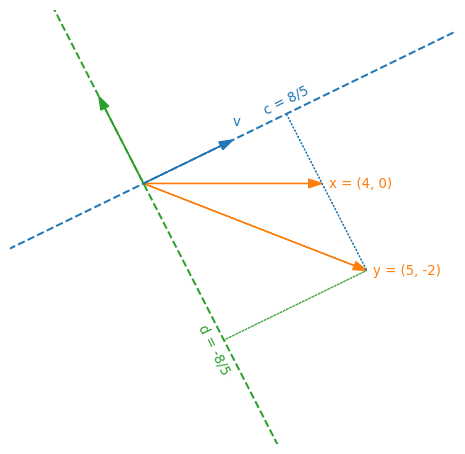

In [4]:
def plot_fig_4(fig, ax):
    # v
    arrow_from_to(ax, (0, 0), (2, 1), color='C0')
    ax.annotate('v', (2, 1.25), ha='left', va='bottom', color='C0')
    ax.plot([-20, 20], [-10, 10], 'C0--')

    # u
    arrow_from_to(ax, (0, 0), (-1, 2), color='C2')
    ax.plot([10, -10], [-20, 20], 'C2--')

    # x
    arrow_from_to(ax, (0, 0), (4, 0), color='C1')
    ax.annotate('x = (4, 0)', (4.15, 0), va='center', color='C1')

    # y
    arrow_from_to(ax, (0, 0), (5, -2), color='C1')
    ax.annotate('y = (5, -2)', (5.15, -2), va='center', color='C1')

    # project y on u and v
    x1, x2 = 5, -2
    v1, v2 = 2, 1
    p = (v1 * x1 + v2 * x2) / (v1**2 + v2**2)
    q = (-v2 * x1 + v1 * x2) / (v1**2 + v2**2)

    # dotted lines
    arrow_from_to(ax, (x1, x2), (v1 * p, v2 * p), color='C0', linestyle=':', head_width=0)
    arrow_from_to(ax, (x1, x2), (-v2 * q, v1 * q), color='C2', linestyle=':', head_width=0)

    # labels
    ax.annotate(f'c = 8/5', (v1 * p, v2 * p), (0, 10), ha='center', va='center',
                textcoords='offset points', rotation=180 * np.arctan(0.5) / np.pi,
                color='C0')
    ax.annotate(f'd = -8/5', (-v2 * q, v1 * q), (-7, -7), ha='center', va='center',
                textcoords='offset points', rotation=-180 * np.arctan(2) / np.pi,
                color='C2')

    ax.set_xlim(-3, 7)
    ax.set_ylim(-6, 4)

    
nice_figure(plot_fig_4)

Since $\b{x}$ and $\b{y}$ have the same component along $\b{v}$, as per our discussion above, we should have that $A\b{x}=A\b{y}$. Indeed:

$$
A\b{x}=\mq{2}{1}{6}{3}\cdot\vv{4}{0}=4\cdot\vv{2}{6}+0\cdot\vv{1}{3}=\vv{8}{24}
$$

$$
A\b{y}=\mq{2}{1}{6}{3}\cdot\vv{5}{-2}=5\cdot\vv{2}{6}-2\cdot\vv{1}{3}=\vv{8}{24}
$$

As we showed above, this happens because $A$ transforms the component parallel to $\b{v}$, and discards the component orthogonal to it. Let us verify this for $\b{x}$:

$$
A\cdot a\b{v}=\frac{8}{5}\cdot\mq{2}{1}{6}{3}\cdot\vv{2}{1}=\frac{8}{5}\cdot\vv{4+1}{12+3}=\vv{8}{24}
$$

$$
A\cdot b\b{v^\perp}=-\frac{4}{5}\cdot\mq{2}{1}{6}{3}\cdot\vv{-1}{2}=-\frac{4}{5}\cdot\vv{-2+2}{-6+6}=\vv{0}{0}
$$

As you can see, the result is in $A$'s column space, i.e. it is a stretched version of $\b{u}$. In fact:

$$
\vv{8}{24}=8\cdot\vv{1}{3}=\left(\frac{8}{5}\cdot 5\right)\cdot\vv{1}{3}=(a\cdot\d{v}{v})\cdot\b{u}
$$

As proved above.

Visually, these three vectors all go to the same place via $A$:

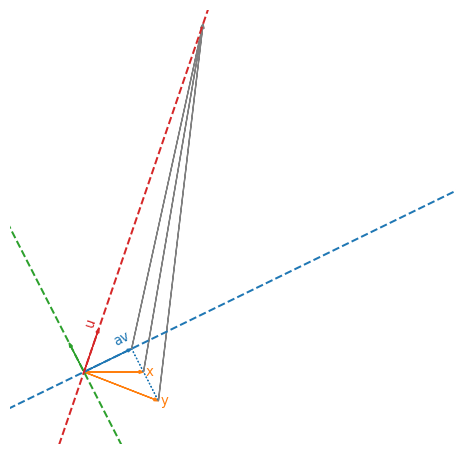

In [5]:
def plot_fig_5(fig, ax):
    # axes
    ax.plot([-200, 200], [-100, 100], 'C0--')
    ax.plot([100, -100], [-200, 200], 'C2--')
    ax.plot([-100, 100], [-300, 300], 'C3--')
    ax.annotate('u', (1, 3), ha='right', va='bottom', color='C3',
                rotation=180 * np.arctan(3) / np.pi,)

    # u and v
    arrow_from_to(ax, (0, 0), (-1, 2), color='C2')
    arrow_from_to(ax, (0, 0), (1, 3), color='C3')

    # x
    arrow_from_to(ax, (0, 0), (4, 0), color='C1')
    ax.annotate('x', (4.15, 0), va='center', color='C1')

    # y
    arrow_from_to(ax, (0, 0), (5, -2), color='C1')
    ax.annotate('y', (5.15, -2), va='center', color='C1')

    # stretched v
    arrow_from_to(ax, (0, 0), (16 / 5, 8 / 5), color='C0')
    ax.annotate('av', (16 / 5, 8 / 5), ha='right', va='bottom',
                color='C0', rotation=180 * np.arctan(0.5) / np.pi,)

    # projection on v
    x1, x2 = 5, -2
    v1, v2 = 2, 1
    p = (v1 * x1 + v2 * x2) / (v1**2 + v2**2)
    q = (-v2 * x1 + v1 * x2) / (v1**2 + v2**2)

    # dotted line
    arrow_from_to(ax, (x1, x2), (v1 * p, v2 * p), color='C0',
                  linestyle=':', head_width=0)

    # gray lines
    arrow_from_to(ax, (4, 0), (8, 24), color='gray')
    arrow_from_to(ax, (5, -2), (8, 24), color='gray')
    arrow_from_to(ax, (16 / 5, 8 / 5), (8, 24), color='gray')

    ax.set_xlim(-5, 25)
    ax.set_ylim(-5, 25)


nice_figure(plot_fig_5)

The key take-away  of this discussion is that, as long as you stay on the blue line, different inputs are always mapped to different outputs. In other words, restricted to the blue and red lines, $A$ is injective, and therefore invertible!

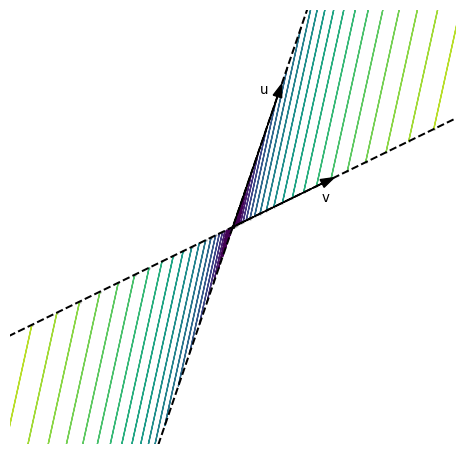

In [6]:
def plot_fig_6(fig, ax):
    ll = np.linspace(-5, 5, 250)
    A = np.array([[2, 1], [6, 3]])

    ps = np.array([[2], [1]]) * ll**4 * np.sign(ll)
    ys = (A @ ps)

    ax.scatter(ps[0], ps[1], s=1, c='k', alpha=0.2)
    cm = plt.get_cmap('viridis')
    for (x1, x2), (y1, y2) in zip(ps.T, ys.T):
        #ax.plot([x1, y1 - x1], [x2, y2 - x2], color=cm((x1**2 + x2**2) / 20))
        ax.arrow(x1, x2, y1 - x1, y2 - x2, color=cm(np.log((y1**2 + y2**2)) / 8))

    ax.arrow(0, 0, 1, 3, color='k', head_width=0.2)
    ax.annotate('u', (0.6, 3), ha='left', va='bottom')
    ax.plot([-10, 10], [-30, 30], 'k--')

    ax.arrow(0, 0, 2, 1, color='k', head_width=0.2)
    ax.annotate('v', (2, 0.5), ha='left', va='bottom')
    ax.plot([-20, 20], [-10, 10], 'k--')

    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)


nice_figure(plot_fig_6)

We already know that the red line is called _column space_ of $A$, and, similarly, the blue line is $\b{R}(A)$, the _row space_ of $A$.


<hr />
<p style="text-align:center;margin:auto;padding:15px;width:70%;">
  The row space of a matrix contains all vectors that are mapped to a different result by the matrix.
</p>
<hr />

If a vector $\b{x}$ is outside of $\b{R}(A)$, we can find a corresponding vector $\b{y}$ in $\b{R}(A)$ such that $A\b{x}=A\b{y}$.

And, since we are fixing terms for core concepts,


<hr />
<p style="text-align:center;margin:auto;padding:15px;width:70%;">
 The null space of a matrix contains all vectors that are orthogonal to the row space.
</p>
<hr />

Which is, in our example, is none other than $\b{v}^\perp$.

## Okay, but I wanted to know about the transpose!

Alright, let's get to it! What does $\t{A}\b{x}$ look like?

$$
\t{A}\b{x}=\t{\left(\b{u}\t{\b{v}}\right)}\b{x}=\b{v}\cdot\left(\t{\b{u}}\b{x}\right)
$$

Remember that at the beginning we found that


$$
A\b{x}=\b{u}\cdot(\d{v}{x})
$$

They look remarkably similar! In fact, $\b{u}$'s and $\b{v}$'s roles are reversed. Obviously, $\b{C}(\t{A})=\b{R}(A)$ and $\b{R}(\t{A})=\b{C}(A)$, since we swap rows and columns, row space and column space are also swapped. But what does this mean? $\t{A}$ moves vectors parallel to $\b{u}$ onto vectors parallel to $\b{v}$, exactly the opposite of $A$.

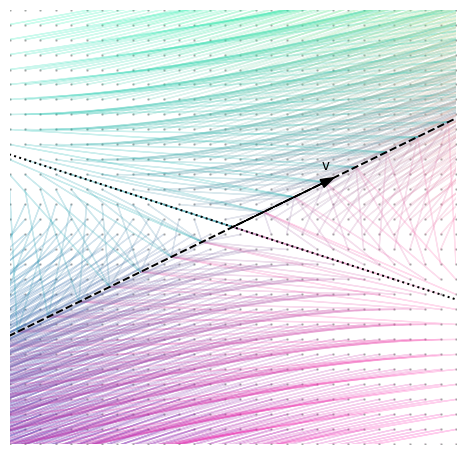

In [7]:
def fig_7(fig, ax):
    lb, ub = -5, 5
    ll = np.linspace(lb, ub, 30)
    xx, yy = np.meshgrid(ll, ll)
    ps = np.vstack([xx.ravel(), yy.ravel()])

    A = np.array([[2, 6], [1, 3]])
    ys = (A @ ps)

    ax.scatter(ps[0], ps[1], s=1, c='k', alpha=0.2)
    for (x1, x2), (y1, y2) in zip(ps.T, ys.T):
        rr = int(255 * (x1 - lb) / (ub - lb))
        gg = int(255 * (x2 - lb) / (ub - lb))
        ax.arrow(x1, x2, y1 - x1, y2 - x2, alpha=0.2, color='#%02x%02xaa' % (rr, gg))

    ax.arrow(0, 0, 2, 1, color='k', head_width=0.2)
    ax.annotate('v', (2, 1.25), ha='left', va='bottom')
    ax.plot([-20, 20], [-10, 10], 'k--')
    ax.plot([-30, 30], [10, -10], 'k:')

    ax.set_xlim(lb, ub)
    ax.set_ylim(lb, ub)
    
    
nice_figure(fig_7)

## So is the transpose just an inverse?

Well not exactly, but you can actually think of it like that (with some caution)! While a matrix maps vectors from its row space to its column space, its transpose goes in the reverse direction, from column space to row space.

What is missing for the transpose to be an actual inverse? Mathematically, we want to find out when

$$
\t{A}A\b{x}=\b{x}
$$

For $\b{x}$ in $\b{R}(A)$, i.e. $\b{x}=a\b{v}$. As we have seen before, $A(a\b{v})=a(\d{v}{v})\b{u}$, and, by symmetry, $\t{A}(b\b{u)}=b(\d{u}{u})\b{v}$. Substituting, we get:

$$
\t{A}A(a\b{v})=\t{A}\left(a(\d{v}{v})\b{u}\right)=a(\d{v}{v})(\d{u}{u})\b{v}
$$

Therefore, $\t{A}$ inverts $A$ when $\d{v}{v}\cdot\d{u}{u}=1$.

<hr />
<p style="text-align:center;margin:auto;padding:15px;width:70%;">
 Since $A$ introduces a certain amount of stretching, $\t{A}$ inverts $A$ (restricted on the row space) when it introduces a corresponding shrinkage.
</p>
<hr />

Using our running example, to make sure the transpose is also the inverse, we simply need to rescale $\b{u}$ and $\b{v}$ to have unit length:

$$
\b{\bar{u}}=(\d{u}{u})^{-1/2}\b{u}=\frac{1}{\sqrt{10}}\cdot\vv{1}{3}
$$

$$
\b{\bar{v}}=(\d{v}{v})^{-1/2}\b{v}=\frac{1}{\sqrt{5}}\cdot\vv{2}{1}
$$

And the corresponding matrix is:

$$
\bar{A}=\b{\b{\bar{u}}}\t{\b{\bar{v}}}=\frac{1}{\sqrt{(\d{u}{u})(\d{v}{v})}}\b{u}\t{\b{v}}=\frac{1}{\sqrt{50}}\mq{2}{1}{6}{3}
$$

Now, $\bar{A}$ and $\t{\bar{A}}$ move things around but do not stretch them, i.e. they leave vector lengths unchanged, as long as we live and die inside $\b{R}(A)$ and $\b{C}(A)$. Vectors outside $\b{R}(A)$ are still stretched, because they are projected onto $\b{R}(A)$ before being launched into $\b{C}(A)$. This is why $\t{\bar{A}}\bar{A}\neq I$, because the trick does not work outside its row space.

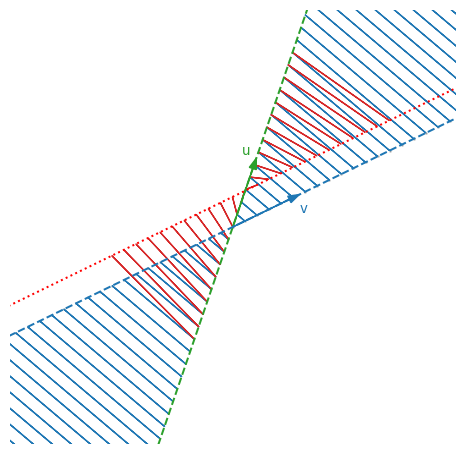

In [60]:
def fig_8(fig, ax):
    lb, ub = -3, 3

    ll = np.linspace(lb, ub, 75)
    A = np.array([[2, 1], [6, 3]]) / np.sqrt(50)

    ps = np.array([[2], [1]]) * ll
    ys = (A @ ps)

    d = 1 / 6
    ax.scatter(ps[0], ps[1], s=1, c='k', alpha=0.2)
    cm = plt.get_cmap('viridis')
    for (x1, x2), (y1, y2) in zip(ps.T, ys.T):
        ax.arrow(x1, x2, y1 - x1, y2 - x2, color='C0') # cm(np.log(1e-15 + (y1**2 + y2**2)) / 4))
        z1, z2 = x1 - 1 * d, x2 + 2 * d
        if -4 < 2 * z1 + z2 < 6:
            ax.arrow(z1, z2, y1 - z1, y2 - z2, color='C3')

    arrow_from_to(ax, (0, 0), (1 / np.sqrt(10), 3 / np.sqrt(10)), color='C2', head_width=0.1)
    ax.annotate('u', (1 / np.sqrt(10) - 0.2, 3 / np.sqrt(10)), ha='left', va='bottom', color='C2')
    ax.plot([-10, 10], [-30, 30], 'C2--')

    arrow_from_to(ax, (0, 0), (2 / np.sqrt(5), 1 / np.sqrt(5)), color='C0', head_width=0.1)
    ax.annotate('v', (2 / np.sqrt(5), 1 / np.sqrt(5) - 0.3), ha='left', va='bottom', color='C0')
    ax.plot([-20, 20], [-10, 10], 'C0--')
    ax.plot([-20 - d, 20 - d], [-10 + 2 * d, 10 + 2 * d], 'r:')

    ax.set_xlim(lb, ub)
    ax.set_ylim(lb, ub)


nice_figure(fig_8)

See? Blue things are not stretched.

## Does this work in higher dimensions?

Absolutely! It's harder to visualize and to understand, but it works in the same way. There is an additional requirement, though: the basis vectors we use must be pairwise orthogonal. Look, $A=CR$, so we are using two matrices $C$ and $R$ to denote bases for the column space and row space respectively. Everything works exactly the same: there will be some $R^\perp$ so that $\b{x}=\t{R}\b{a}+{(\t{R})}^\perp \b{b}$ and $A\b{x}=CR\t{R}\b{a}$. Transposing, $\t{A}A(\t{R}\b{a})=\t{R}(\t{C}C)(R\t{R})\b{a}$, which means that $\t{A}=A^{-1}$ if and only if $\t{C}C=R\t{R}=I$.

Let's take:

$$
R=\frac{1}{\sqrt{10}}\cdot\mq{1}{3}{3}{-1}
$$

$$
C=\frac{1}{\sqrt{5}}\cdot\mq{-2}{1}{1}{2}
$$

Which give us:

$$
A=\frac{1}{\sqrt{50}}\mq{1}{7}{-7}{1}
$$

Even though $A$ is a $2\times 2$ matrix, like before, it has a higher rank (two) compared to the example we used at the beginning (which was rank one). The rank indicates the dimensionality of $\b{R}(A)$ and $\b{C}(A)$: before they were a single vector (dimension one), while now they are planes (dimension two). Since $A$ is now full rank (i.e., its rank corresponds to the number of rows/columns), it does not squash different vectors into the same point.

Orthogonal rows and columns and the normalization constant make $A$ a very peculiar transformation:

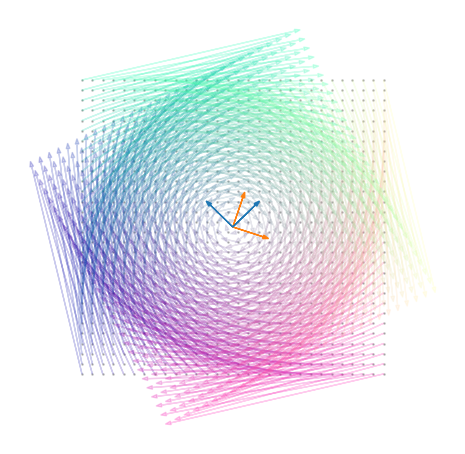

In [9]:
def fig_8(fig, ax):
    u1 = np.array([1., 3.])
    u2 = np.array([3., -1.])

    v1 = np.array([-1., 1.])
    v2 = np.array([1., 1.])

    u1 /= np.sqrt(u1 @ u1)
    u2 /= np.sqrt(u2 @ u2)
    v1 /= np.sqrt(v1 @ v1)
    v2 /= np.sqrt(v2 @ v2)

    A = np.array([u1, u2]).T @ np.array([v1, v2]).T
    
    plot_linear_map(ax, A, -4, 4, 30)

    arrow_from_to(ax, (0, 0), u1, head_width=0.1, color='C1')
    arrow_from_to(ax, (0, 0), u2, head_width=0.1, color='C1')

    arrow_from_to(ax, (0, 0), v1, head_width=0.1, color='C0')
    arrow_from_to(ax, (0, 0), v2, head_width=0.1, color='C0')

    
nice_figure(fig_8)

A rotation!

**Orthogonal matrix:** A matrix $Q$ is called orthogonal if $\t{Q}=Q^{-1}$. The matrix $A$ above is orthogonal. Orthogonal matrices are rotations: they do not introduce stretching. If $Q$ rotates in a certain way, $Q^T$ undoes the rotation.

## Conclusion

The transpose equals the inverse only for full rank matrices with orthogonal rows and columns. The idea of the transpose as an inverse, however, still works with matrices that are not full rank **if**

 1. You only consider vectors in the row/column spaces, and
 2. The matrix does not stretch or shrink vectors.

Even in absence of these conditions, it is useful to think of the transpose as a way to go back from where you started, although not exactly in the same location.

## Afterword

Only now I realize that this post is probably filled with trivialities. It traces the journey I made on a paper notebook trying to answer the question that is now the title of the post, because I really could not understand the purpose of transposes. Although I found nothing that I didn't know before starting, doing these computations and drawings by hand clarified and connected several basic concepts that I studied but never understood.